In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelBinarizer


import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow import feature_column

# The following lines adjust the granularity of reporting.
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

In [ ]:
#df = pd.read_csv('train.csv')
df = pd.read_csv('train_imputed.csv')

In [ ]:
display(df.head(5))

,patient_id,patient_zip3,patient_age,bmi,population,density,age_median,age_under_10,age_10_to_19,age_20s,...,metastatic_diagnosis_period,bmi_null,patient_race,payer_type,patient_state,Region,Division,patient_gender,breast_cancer_diagnosis_code,metastatic_cancer_diagnosis_code
0,268700.0,724.0,39.0,29.7,3924.9,82.6,42.6,11.6,13.0,10.9,...,191.0,1.0,Asian,COMMERCIAL,AR,South,West South Central,F,C50912,C773
1,484983.0,629.0,55.0,35.4,2745.4,51.8,43.5,11.2,12.2,11.4,...,33.0,0.0,White,COMMERCIAL,IL,Midwest,East North Central,F,C50412,C773
2,277055.0,925.0,59.0,29.7,38343.2,700.3,36.3,13.3,15.7,13.5,...,157.0,1.0,Asian,COMMERCIAL,CA,West,Pacific,F,1749,C773
3,320055.0,900.0,59.0,27.5,36054.1,5294.3,36.6,9.8,11.3,17.2,...,146.0,1.0,Hispanic,MEDICAID,CA,West,Pacific,F,C50911,C773
4,190386.0,934.0,71.0,28.1,13700.4,400.5,41.8,10.0,16.4,13.0,...,286.0,1.0,Asian,COMMERCIAL,CA,West,Pacific,F,1748,C7951


In [ ]:

# information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13173 entries, 0 to 13172
Columns: 150 entries, patient_id to metastatic_cancer_diagnosis_code
dtypes: float64(142), object(8)
memory usage: 15.1+ MB


In [ ]:
# shaoe of the dataframe, the rows and columns
df.shape

(13173, 150)

In [ ]:
# print out different data types
# Categorical columns
cat_col = [col for col in df.columns if df[col].dtype == 'object']
print('Categorical columns :',cat_col)
# Numerical columns
num_col = [col for col in df.columns if df[col].dtype != 'object']
print('Numerical columns :',num_col)

Categorical columns : ['patient_race', 'payer_type', 'patient_state', 'Region', 'Division', 'patient_gender', 'breast_cancer_diagnosis_code', 'metastatic_cancer_diagnosis_code']
Numerical columns : ['patient_id', 'patient_zip3', 'patient_age', 'bmi', 'population', 'density', 'age_median', 'age_under_10', 'age_10_to_19', 'age_20s', 'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s', 'age_over_80', 'male', 'female', 'married', 'divorced', 'never_married', 'widowed', 'family_size', 'family_dual_income', 'income_household_median', 'income_household_under_5', 'income_household_5_to_10', 'income_household_10_to_15', 'income_household_15_to_20', 'income_household_20_to_25', 'income_household_25_to_35', 'income_household_35_to_50', 'income_household_50_to_75', 'income_household_75_to_100', 'income_household_100_to_150', 'income_household_150_over', 'income_household_six_figure', 'income_individual_median', 'home_ownership', 'housing_units', 'home_value', 'rent_median', 'rent_burden', 'educa

In [ ]:
age_data = df.iloc[:,21:30]

In [ ]:
age_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27674 entries, 0 to 27673
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age_under_10  27674 non-null  float64
 1   age_10_to_19  27674 non-null  float64
 2   age_20s       27674 non-null  float64
 3   age_30s       27674 non-null  float64
 4   age_40s       27674 non-null  float64
 5   age_50s       27674 non-null  float64
 6   age_60s       27674 non-null  float64
 7   age_70s       27674 non-null  float64
 8   age_over_80   27674 non-null  float64
dtypes: float64(9)
memory usage: 1.9 MB


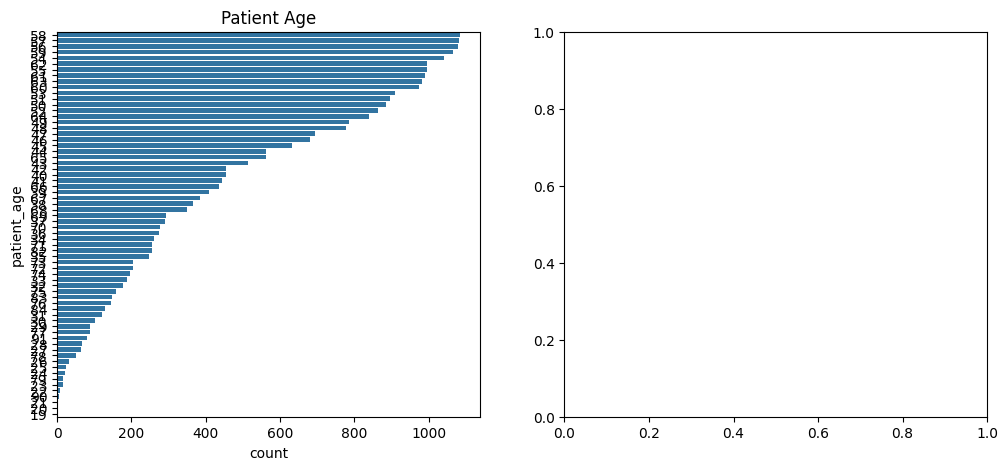

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
sns.countplot(df, y='patient_age', order=df['patient_age'].value_counts().index, ax=axs[0]).set(title='Patient Age')
# sns.countplot(df, y='education', order=df['education'].value_counts().index, ax=axs[1]).set(title='education count')
plt.show()

[Text(0.5, 1.0, 'BMI Box Plot')]

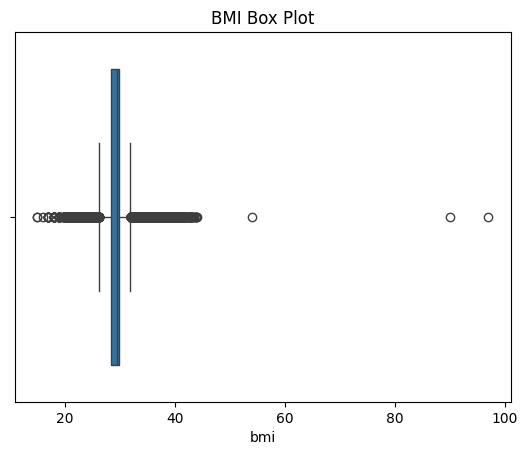

In [ ]:
# The box plot
sns.boxplot(df, x = 'bmi').set(title='BMI Box Plot')


<ipython-input-45-b6e09795c5e6>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df, x = 'patient_age', palette='flare').set(title='Patient Age Box Plot')


[Text(0.5, 1.0, 'Patient Age Box Plot')]

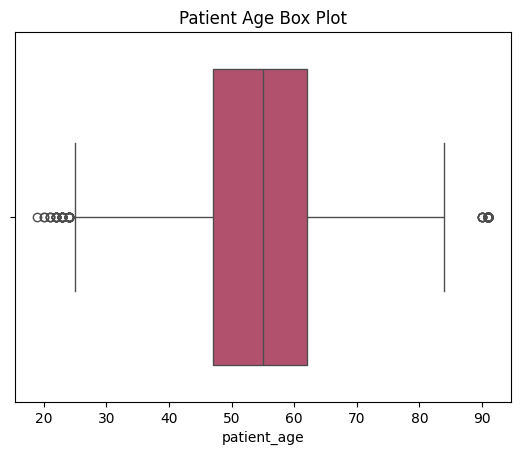

In [ ]:
sns.boxplot(df, x = 'patient_age', palette='flare').set(title='Patient Age Box Plot')

In [ ]:
df['patient_age'].describe()

count    27674.000000
mean        54.456421
std         11.202089
min         19.000000
25%         47.000000
50%         55.000000
75%         62.000000
max         91.000000
Name: patient_age, dtype: float64

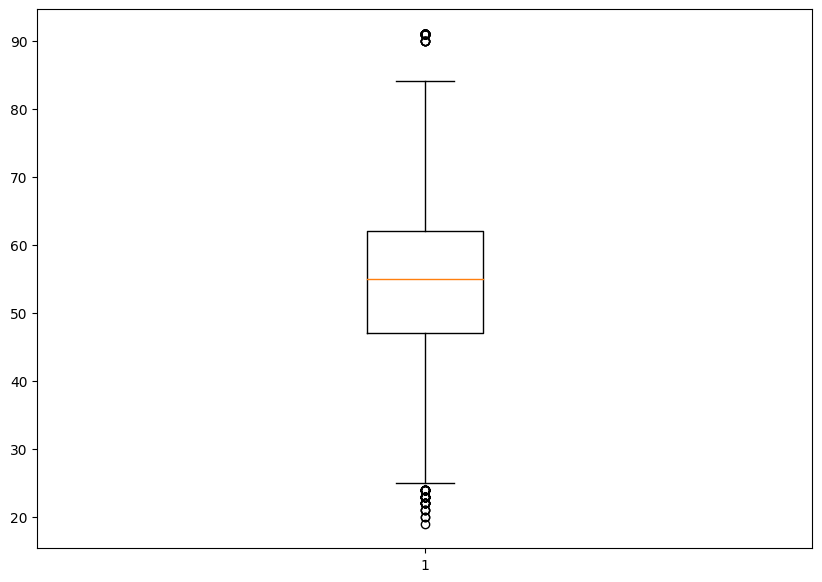

In [ ]:
fig = plt.figure(figsize =(10, 7))

# Creating plot
plt.boxplot(df['patient_age'])

# show plot
plt.show()

In [ ]:
df['patient_age'].describe()


count    27674.000000
mean        54.456421
std         11.202089
min         19.000000
25%         47.000000
50%         55.000000
75%         62.000000
max         91.000000
Name: patient_age, dtype: float64

In [ ]:
df.head()

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,...,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,treatment_pd
0,994155,Asian,COMMERCIAL,CA,917,46,F,27.0,C50811,Malignant neoplasm of ovrlp sites of right fem...,...,18.858696,11.426087,47.726087,9.895652,10.515217,12.745652,32.530435,7.263043,3.810870,35
1,154389,NaN,MEDICARE ADVANTAGE,OH,451,63,F,NaN,C50412,Malig neoplasm of upper-outer quadrant of left...,...,0.255319,2.234043,1.182979,18.317021,13.546809,0.146809,31.890909,7.631915,9.631915,33
2,387343,NaN,COMMERCIAL,TX,773,53,F,NaN,C50212,Malig neoplasm of upper-inner quadrant of left...,...,3.588679,7.915094,21.064151,14.083019,11.943396,2.549057,32.556250,16.396226,10.392453,24
3,921275,Hispanic,MEDICAID,CA,928,50,F,NaN,1749,"Malignant neoplasm of breast (female), unspeci...",...,11.645455,10.081818,37.948485,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,455
4,803454,NaN,COMMERCIAL,NY,112,39,F,18.0,1749,"Malignant neoplasm of breast (female), unspeci...",...,9.184211,6.089474,18.960526,10.194737,18.642105,14.173684,42.502632,6.392105,1.755263,162


<ipython-input-28-e5924885b38a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df, y ='patient_race', order = df['patient_race'].value_counts(ascending=True).index, palette='flare')


Text(0.5, 1.0, 'Patient Race')

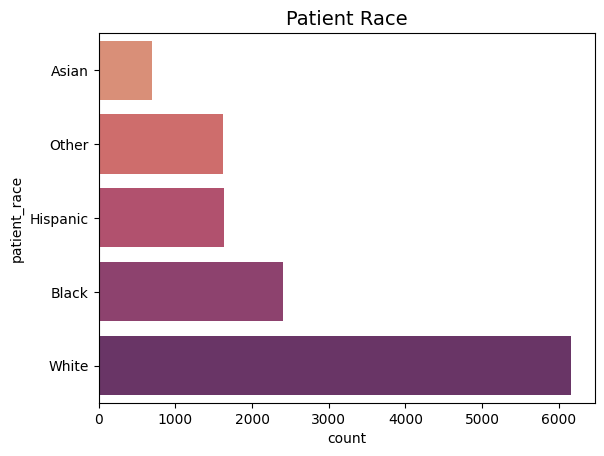

In [ ]:
sns.countplot(df, y ='patient_race', order = df['patient_race'].value_counts(ascending=True).index, palette='flare')
plt.title('Patient Race', fontsize=14)

<Axes: xlabel='payer_type'>

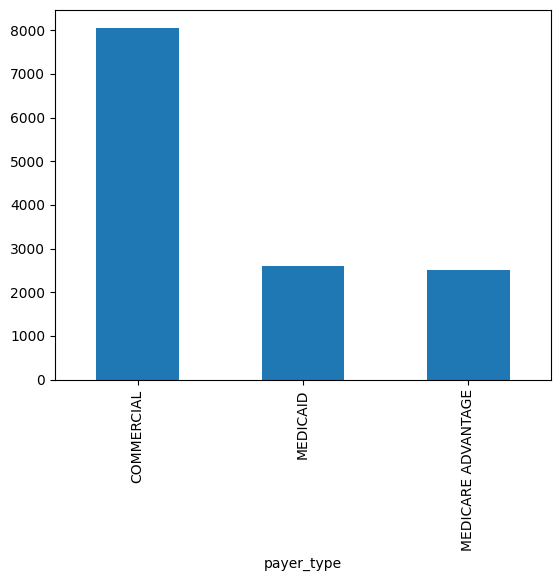

In [ ]:
df['payer_type'].value_counts().plot(kind='bar')

In [ ]:
df['bmi'].describe()

count   13173.0
mean       29.2
std         3.3
min        15.0
25%        28.4
50%        29.4
75%        29.8
max        97.0
Name: bmi, dtype: float64

<Axes: xlabel='patient_race'>

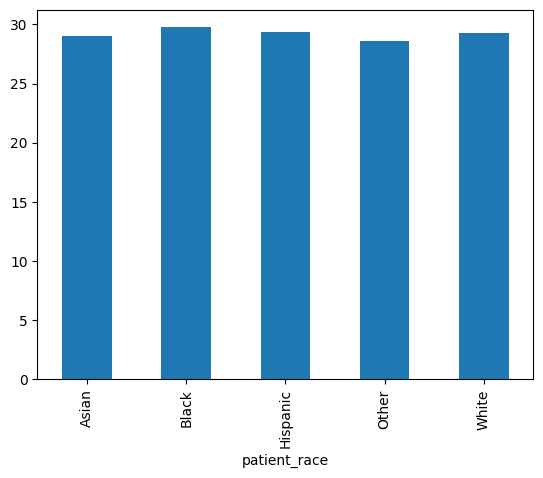

In [ ]:
# plot correlation between categorical values vs. numerical values
df.groupby(['patient_race'])["bmi"].mean().plot(kind='bar')

<Axes: xlabel='patient_race'>

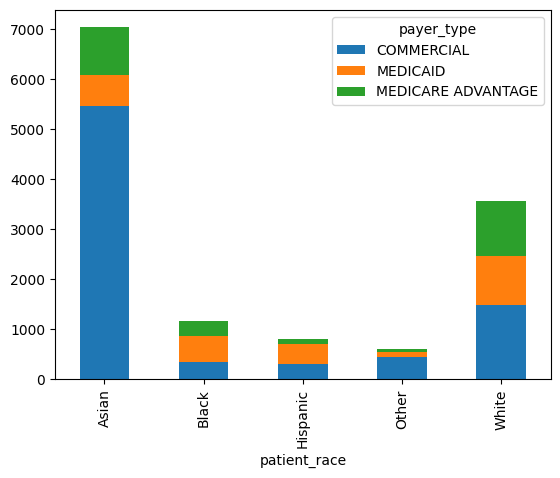

In [ ]:
# plot correlation between categorical values vs. categorical values
pd.crosstab(df['patient_race'], df['payer_type']).plot(kind="bar",stacked=True)

<Axes: ylabel='bmi'>

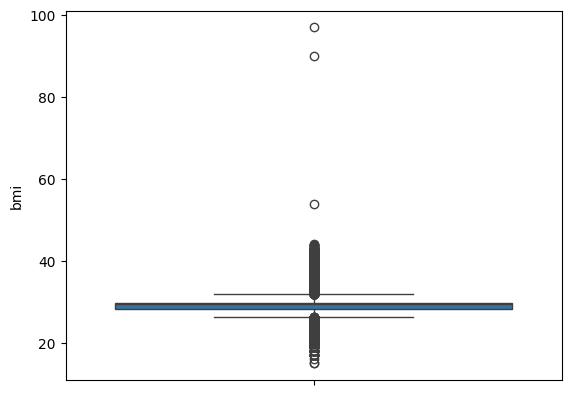

In [ ]:
# Plot the BMI value to detect outliners
sns.boxplot(df['bmi'])

# outliner_train_df = train_df[train_df['bmi'] >70]
# display(outliner_train_df)

In [ ]:
outliner_df = df[df['bmi'] >50]
display(outliner_df)

,patient_id,patient_zip3,patient_age,bmi,population,density,age_median,age_under_10,age_10_to_19,age_20s,...,metastatic_diagnosis_period,bmi_null,patient_race,payer_type,patient_state,Region,Division,patient_gender,breast_cancer_diagnosis_code,metastatic_cancer_diagnosis_code
5999,426903.0,906.0,19.0,90.0,40982.1,3008.8,37.1,10.8,15.6,16.0,...,0.0,0.0,Hispanic,MEDICAID,CA,West,Pacific,F,C50412,C773
7556,890022.0,425.0,33.0,97.0,5697.5,38.9,43.6,11.4,12.6,10.1,...,132.0,0.0,White,MEDICAID,KY,South,East South Central,F,C50912,C779
8329,620447.0,600.0,18.0,54.0,25744.5,981.8,41.8,11.8,13.9,10.6,...,11.0,0.0,Asian,COMMERCIAL,IL,Midwest,East North Central,F,C50912,C773


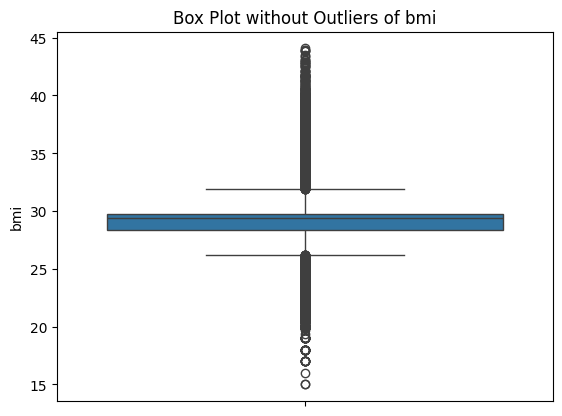

In [ ]:
def removal_box_plot(df, column, threshold):
    removed_outliers = df[df[column] <= threshold]

    sns.boxplot(removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    return removed_outliers

threshold_value = 50
no_outliers = removal_box_plot(df, 'bmi', threshold_value)

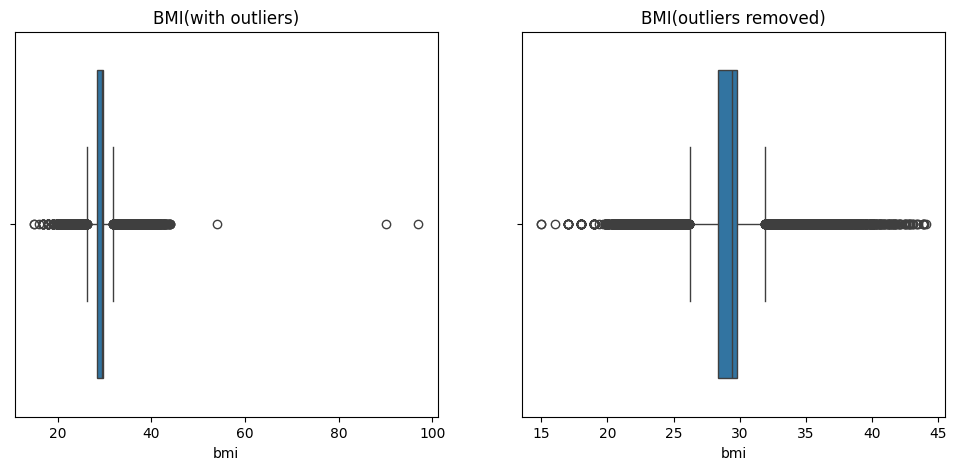

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
#sns.countplot(df, y='patient_age', order=df['patient_age'].value_counts().index, ax=axs[0]).set(title='Patient Age')
sns.boxplot(df, x = 'bmi',ax=axs[0]).set(title='BMI(with outliers)')
sns.boxplot(no_outliers, x = 'bmi',ax=axs[1]).set(title='BMI(outliers removed)')
plt.show()

[Text(0.5, 1.0, 'BMI Box Plot (outliers removed)')]

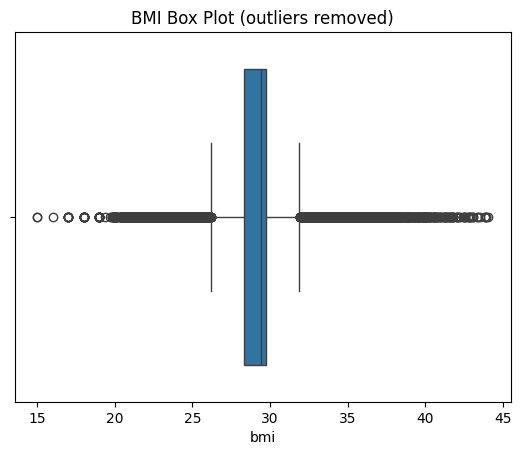

In [ ]:
sns.boxplot(no_outliers, x = 'bmi').set(title='BMI Box Plot (outliers removed)')

In [ ]:
def removal_outlier(df, column, threshold):
    removed_outliers = df[df[column] <= threshold]
    return removed_outliers

threshold_value = 50
no_outliers = removal_outlier(df, 'bmi', threshold_value)